Accuracy: 0.4642857142857143

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.45      1.00      0.62        10
           5       0.75      0.33      0.46         9

    accuracy                           0.46        28
   macro avg       0.30      0.33      0.27        28
weighted avg       0.40      0.46      0.37        28



C:\Users\binish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\binish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\binish\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


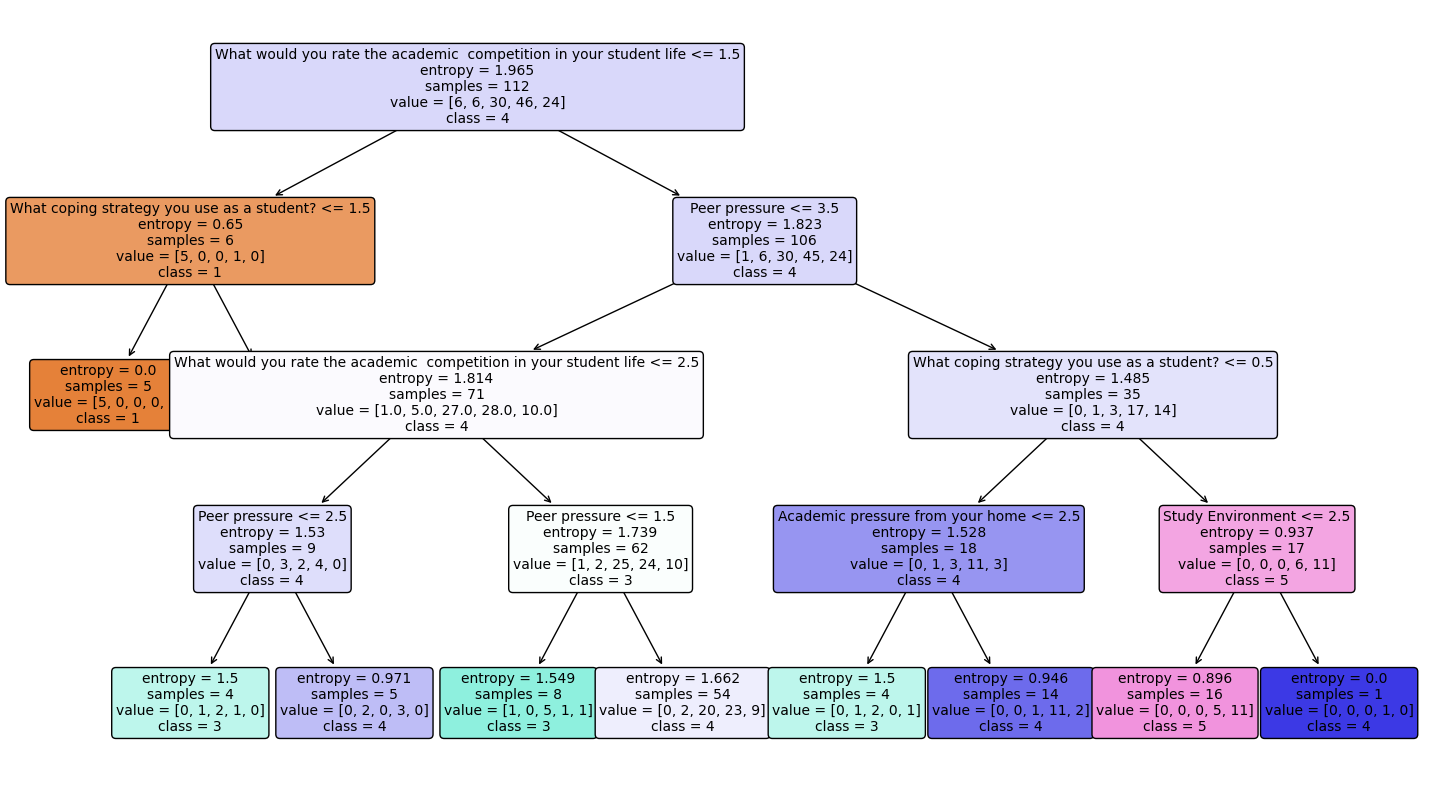

Binish Moosa 232P001
Sample Features:
      Your Academic Stage  Peer pressure  Academic pressure from your home  \
108                    0              3                                 3   

     Study Environment  What coping strategy you use as a student?  \
108                  1                                           0   

     Do you have any bad habits like smoking, drinking on a daily basis?  \
108                                                  0                     

     What would you rate the academic  competition in your student life  
108                                                  3                   
Predicted Stress Index: 4


In [3]:
# Aim: Implement decision tree on any case study.
# Binish Moosa
# 232P001  24

# 📌 Decision Tree on Academic Stress Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('academic_Stress_level_maintainance.csv') 

# Drop Timestamp column (not useful)
df = df.drop(columns=["Timestamp"])

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Features (X) and Target (y)
X = df.drop(columns=["Rate your academic stress index "])
y = df["Rate your academic stress index "]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 📊 Visualize Decision Tree
plt.figure(figsize=(18,10))
plot_tree(clf, feature_names=X.columns, class_names=[str(c) for c in sorted(y.unique())],
          filled=True, rounded=True, fontsize=10)
plt.show()

# 🔍 Test with a custom sample (example)
sample = X_test.iloc[0:1]   # Take first test sample
print("Binish Moosa 232P001")
print("Sample Features:\n", sample)
print("Predicted Stress Index:", clf.predict(sample)[0])
